# EDA Netflix Movies and TV Shows


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud, ImageColorGenerator
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import seaborn as sns
from PIL import Image

In [2]:
#Import data
df = pd.read_csv("netflix_titles.csv", index_col = 0) #Data that we will work on
df_clean = pd.read_csv("netflix_titles.csv", index_col = 0) #Raw data

## Data learning

In [3]:
df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.shape

(8807, 11)

In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.nunique()

type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [9]:
# Number of missing values in each column
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


## Data cleaning

In [10]:
#Handling the missing values
df["rating"].fillna("No rating", inplace = True)
df["cast"].fillna("No cast", inplace = True)
df["country"].fillna("No country", inplace = True)
df["duration"].fillna("No duration", inplace = True)
#Drop rows with Missing Values
df = df[pd.notnull(df['director'])]

In [11]:
# Number of missing values in each column to make sure we clean it properly
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [12]:
#Change columns name
df.rename(columns={"type": "category"},inplace = True)

In [13]:
df

,category,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",No country,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",No country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...
s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [14]:
df.shape

(6173, 11)

## Statistical Analysis

In [15]:
# describing Statistical data
df.describe(include = 'all')

,category,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,6173,6173,6173,6173,6173,6173,6173.000000,6173,6173,6173,6173
unique,2,6173,4528,5513,659,1544,NaN,18,212,359,6150
top,Movie,Someone Great,Rajiv Chilaka,No cast,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,5943,1,19,473,2048,98,NaN,2117,184,361,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,2013.180625,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,9.674679,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [16]:
#Classification of movies and series
df['category'].value_counts()

Movie      5943
TV Show     230
Name: category, dtype: int64

In [17]:
#Amount of reviews by review type
df["rating"].value_counts()

TV-MA        2117
TV-14        1457
R             795
TV-PG         538
PG-13         489
PG            286
TV-Y7         132
TV-G          118
TV-Y          112
NR             75
G              41
TV-Y7-FV        4
UR              3
NC-17           2
74 min          1
66 min          1
No rating       1
84 min          1
Name: rating, dtype: int64

In [18]:
#Analysis of content lengths
df['duration'].value_counts()

1 Season    184
90 min      148
93 min      145
94 min      144
97 min      143
           ... 
194 min       1
191 min       1
253 min       1
229 min       1
205 min       1
Name: duration, Length: 212, dtype: int64

In [19]:
#A review of the oldest and newest content
df['release_year'].agg(['min', 'max'])

min    1942
max    2021
Name: release_year, dtype: int64

In [20]:
#Count how many contents per country
df_countries = pd.DataFrame(df.country.value_counts().reset_index().values, columns=["country", "count"])
df_countries.head(10)

,country,count
0,United States,2048
1,India,890
2,No country,422
3,United Kingdom,212
4,Canada,119
5,Spain,106
6,Nigeria,90
7,Egypt,90
8,Japan,85
9,France,81


## Word Cloud

<Figure size 720x432 with 0 Axes>

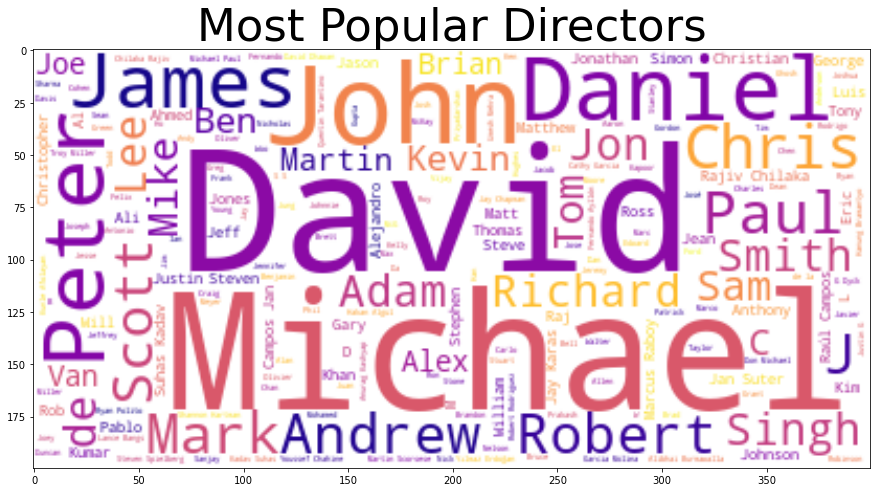

In [21]:
# use worldcloud to vizual the common director names
text = " ".join(str(each) for each in df.director)
# Create
wordcloud = WordCloud(max_words=500, background_color="white",colormap='plasma_r').generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display
plt.imshow(wordcloud, interpolation='Bilinear')
plt.title('Most Popular Directors',fontsize = 45)
#plt.axis("off")
plt.show()

<Figure size 720x432 with 0 Axes>

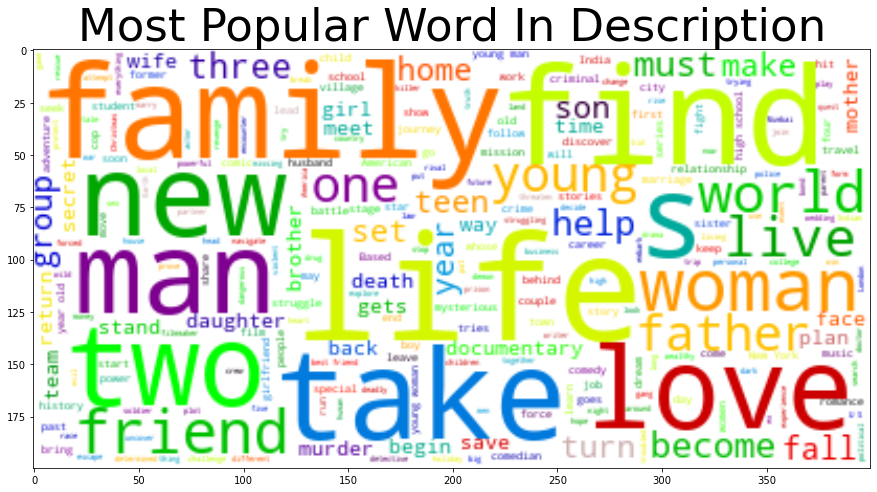

In [22]:
# use worldcloud to vizual the common description words
text = " ".join(str(each) for each in df.description)
# Create
wordcloud = WordCloud(max_words=500, background_color="white",colormap='nipy_spectral_r').generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display
plt.imshow(wordcloud, interpolation='Bilinear')
plt.title('Most Popular Word In Description',fontsize = 45)
#plt.axis("off")
plt.show()



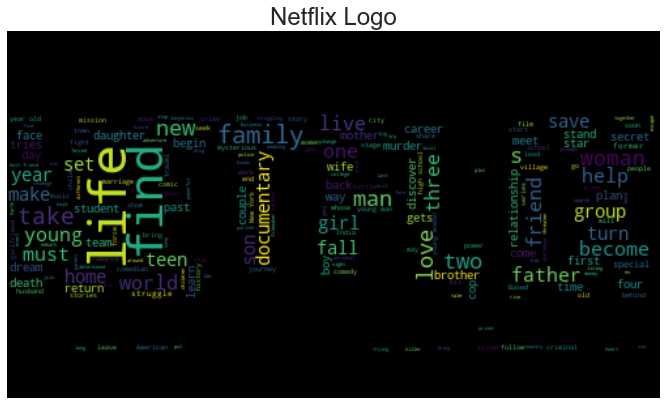

In [23]:
#I tried to do it with a logo, I didn't succeed because I couldn't find a proper logo
text = " ".join(str(each) for each in df.description)
G = np.array(Image.open('Netflix1.jpg'))

sns.set(rc={'figure.figsize':(11.7,8.27)})

wordcloud = WordCloud(mask=G,background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Netflix Logo',size=24)
plt.show()

## Validation WordCloud

In [24]:
#top ten directors to validate my worldcloud analysis
top_ten_directors = df['director'].value_counts()[:10]
top_ten_directors

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: director, dtype: int64

## Visualisation

<AxesSubplot:title={'center':'contents per country'}, xlabel='country'>

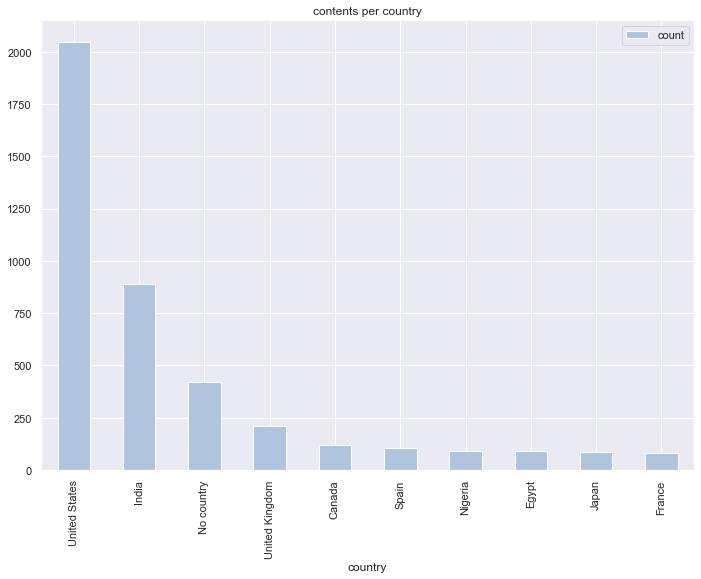

In [25]:
#Visualize the results of how many contents per country
df_countries.head(10).plot(kind='bar',x='country',color='lightsteelblue',title='contents per country')

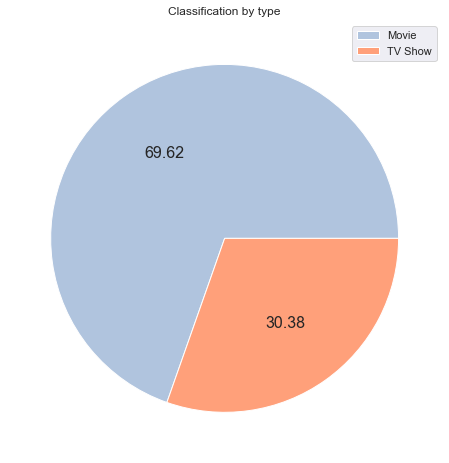

In [26]:
#Visualize the results of how many contents per Classification
#df['category'].value_counts().plot(kind='bar',color='red',title='contents per Classification')

#based on raw data!
plt.figure(figsize=(10,8))

plt.pie(df_clean.type.value_counts(), 
        labels = df_clean.type.value_counts().index, 
        labeldistance = None, autopct="%.2f", 
        textprops = {'fontsize': 16,}, 
        colors = ['lightsteelblue','lightsalmon' ] 
        )
plt.title('Classification by type')
plt.legend()
plt.show()

Text(0, 0.5, 'Number of shows')

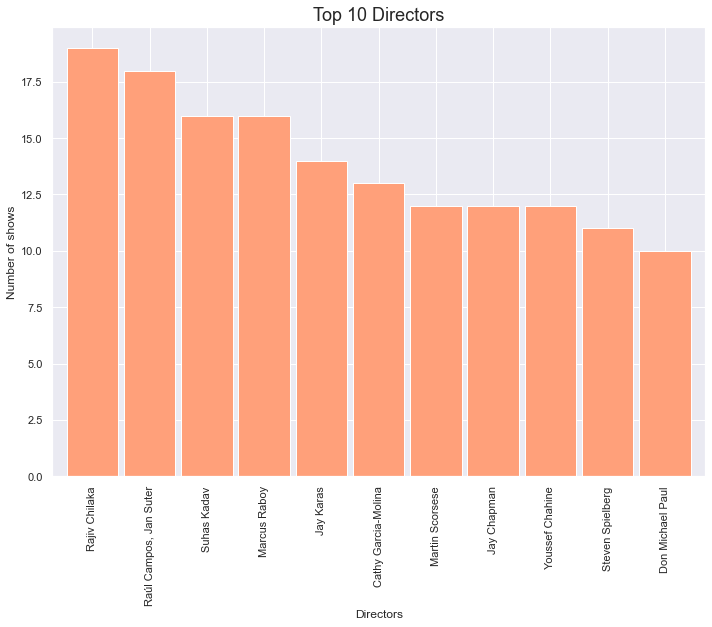

In [27]:
#Visualize the directors with the most content

plt.title('Top 10 Directors', fontsize=18)
df2=df['director'].value_counts()
df2.iloc[0:11].plot(kind='bar',width = 0.9,color='lightsalmon')
plt.xlabel("Directors")
plt.ylabel("Number of shows")

# Exercise 2

## Import the data

In [28]:
df = pd.read_csv('Project_partB.csv')
mdf = pd.read_csv('Project_partB.csv')

## Clean the data

In [29]:
#delete all url dont start with twitter
mdf = df[df.full_link.str.startswith(('https://twitter.com/'))]
#delete all url dont continans string after .com
mdf = mdf[mdf["full_link"].str.endswith("https://twitter.com/")==False]
#delete https://twitter.com/i/web/   and https://twitter.com/account/suspended
mdf = mdf[mdf["full_link"].str.contains("https://twitter.com/i/web/|https://twitter.com/account/suspended") == False]
#delete specific string from record that end with video/1 or photo/1
mdf["full_link"]=mdf["full_link"].str.replace("photo/1","")
mdf["full_link"]=mdf["full_link"].str.replace("video/1","")

In [30]:
#create es and en columns
test1=mdf.groupby(["full_link", "lang"])['total_t.co_count'].sum().unstack(fill_value=0)
#union all url into 1 column
mdf['t.co_link2'] = df.groupby('full_link', sort=False)['t.co_link'].transform('sum')
#extract the user_id
mdf['user_ID'] = mdf['full_link'].str.split('status/').str[-1].str.split('/').str[0]
#extract the user_name
mdf['user_name'] = mdf['full_link'].str.split('twitter.com/').str[-1].str.split('/').str[0]

In [38]:
#build the final output
#pd.concat([test1, mdf['t.co_link']])
a=test1.merge(mdf, on='full_link')
#final!!!
Final_output = a[['full_link','en','es','t.co_link2','user_ID','user_name']]

#delete duplicates
Final_output.drop_duplicates(keep=False)

Final_output

,full_link,en,es,t.co_link2,user_ID,user_name
0,https://twitter.com/0114jong94/status/89060264...,314,0,https://t.co/JoVoh4mJUc,890602643856310273,0114jong94
1,https://twitter.com/0202Juless/status/10121008...,0,708,https://t.co/7pHUxuqNVT,1012100835298299905,0202Juless
2,https://twitter.com/03_diegoo/status/108180535...,0,952,https://t.co/S4btFRIVZP,1081805359579312128,03_diegoo
3,https://twitter.com/0430darlene/status/9600670...,1087,0,https://t.co/gMOzZqPgJZ,960067014462119936,0430darlene
4,https://twitter.com/047Chandra?protected_redir...,1441,0,https://t.co/AI8NADlA0m,https:,047Chandra?protected_redirect=true
...,...,...,...,...,...,...
23760,https://twitter.com/zweiha/status/104240928732...,0,842,https://t.co/bo2jdOn6Hf,1042409287321038853,zweiha
23761,https://twitter.com/zykeetv/status/99058003147...,550,0,https://t.co/YTgsYRbgkl,990580031478026240,zykeetv
23762,https://twitter.com/zyraroxx/status/1062875926...,395,0,https://t.co/1MNaVQUPuF,1062875926499745792,zyraroxx
23763,https://twitter.com/zywdna/status/100713202108...,0,1384,https://t.co/xuCieWk1Tu,1007132021083254784,zywdna


## save the output to a new csv

In [32]:
#Final_output.to_csv('Question2_output.csv', encoding='utf-8')